# Scenario discovery
The next step in the analysis is the scenario discovery. This will be done by the following points:
1. A base case will run with 15.000 scenarios and zero levers. 
2. The 10% worst case outcomes for A.2_Expected Annual Damage and A.2_Expected Number of Deaths will be selected.
3. PRIM analysis is conducted two times, ones for Expected Annual Damage and ones for Expected Number of Deaths. 
4. Resampling methods and dimensional stacking are used to validate the outcomes.
5. Five scenarios will be chosen for the rest of the analysis. 
The code of the scenario discovery is based on the code of Jan Kwakkel on [GitHub](https://github.com/quaquel/epa141A_open/tree/master/Week%203-4%20-%20vulnerability%20analysis) for EPA141A week 3-4.

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from ema_workbench import (
    Model,
    Policy,
    SequentialEvaluator,
    MultiprocessingEvaluator,
    ema_logging,
    Scenario
)

from ema_workbench.analysis import prim, dimensional_stacking, parcoords
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
# Select problem formulation
dike_model, planning_steps = get_model_for_problem_formulation(6)

A base case is defined to run the model. It is not clear which policy will be implemented eventually, and it would be strange to create scenarios for policies which will not exist.  Therefore, all levers are set to zero to get a clear overview without possible policies.

In [3]:
# Create a base case
base_case = Policy("base case", **{l.name: 0 for l in dike_model.levers})

The model will run, and create 15.000 scenarios which can be evaluated later. 

In [4]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=15000, policies=base_case)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 15000 scenarios * 1 policies * 1 model(s) = 15000 experiments
100%|████████████████████████████████████| 15000/15000 [53:23<00:00,  4.68it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [5]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,35,56.770354,10.0,0.167112,275.269960,1.5,0.338250,335.934435,1.0,0.065954,...,0,0,0,0,0,0,0,0,base case,dikesnet
1,64,290.043808,10.0,0.616973,48.474704,10.0,0.584242,226.369852,1.0,0.102663,...,0,0,0,0,0,0,0,1,base case,dikesnet
2,4,127.660349,1.0,0.849162,305.509687,1.5,0.696905,288.352306,10.0,0.069314,...,0,0,0,0,0,0,0,2,base case,dikesnet
3,50,94.516674,10.0,0.159868,265.470209,10.0,0.755381,306.889816,1.5,0.027447,...,0,0,0,0,0,0,0,3,base case,dikesnet
4,61,183.838133,10.0,0.134641,240.706765,1.0,0.411977,118.332377,1.5,0.566460,...,0,0,0,0,0,0,0,4,base case,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,27,272.959439,1.0,0.621399,303.113455,10.0,0.376090,258.204277,1.5,0.993404,...,0,0,0,0,0,0,0,14995,base case,dikesnet
14996,79,336.940797,10.0,0.320652,295.751804,10.0,0.605748,174.751724,1.5,0.903411,...,0,0,0,0,0,0,0,14996,base case,dikesnet
14997,96,215.424513,1.5,0.397342,193.975639,1.5,0.435750,44.889686,10.0,0.653566,...,0,0,0,0,0,0,0,14997,base case,dikesnet
14998,28,79.401197,1.5,0.909390,241.599681,1.5,0.987035,168.702314,1.0,0.306648,...,0,0,0,0,0,0,0,14998,base case,dikesnet


In [7]:
# Transform the outcomes to a Pandas DataFrame
outcomes_df = pd.DataFrame(outcomes)

In [8]:
outcomes_df

,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,RfR 0 Individual Costs,RfR 1 Individual Costs,RfR 2 Individual Costs,RfR 3 Individual Costs,RfR 4 Individual Costs
0,7.131831e+07,0,0.069404,0.0,0.0,0,0,0,0,0
1,3.740204e+07,0,0.046099,0.0,0.0,0,0,0,0,0
2,1.953419e+07,0,0.022992,0.0,0.0,0,0,0,0,0
3,0.000000e+00,0,0.000000,0.0,0.0,0,0,0,0,0
4,0.000000e+00,0,0.000000,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14995,1.527572e+08,0,0.133819,0.0,0.0,0,0,0,0,0
14996,0.000000e+00,0,0.000000,0.0,0.0,0,0,0,0,0
14997,0.000000e+00,0,0.000000,0.0,0.0,0,0,0,0,0
14998,3.549746e+06,0,0.003938,0.0,0.0,0,0,0,0,0


The experiments and outcomes will be saved in a CVS file. It took some time to run the model, and this way we can load the experiments in faster for the rest of the analysis. 

In [ ]:
# Save experiments to CSV
experiments.to_csv('prim_experiments_15000.csv')
# Save outcomes to CSV
outcomes_df.to_csv('prim_outcomes_15000.csv')

## Prepare data for PRIM

In [2]:
# Load the experiments dataframe
experiments = pd.read_csv('prim_experiments_15000.csv')
experiments = experiments.drop(columns=['Unnamed: 0'])

In [3]:
# Load the outcomes dataframe
outcomes_df = pd.read_csv('prim_outcomes_15000.csv')
outcomes_df = outcomes_df.drop(columns=['Unnamed: 0'])

The experiments are cleaned by only selecting the uncertainties. These are defined as x. The y variables will be the worst cases of outcomes. The focus will be on the worst cases for A2, since this is the only dike ring in the area of Waterboard 2. The worst cases will be selected by taking the 10% worst cases for 'A.2_Expected Annual Damage' outcomes, and 'A.2_Expected Number of Deaths' outcomes. Therefore, there is a y_worst_damage and y_worst_deaths.

In [4]:
# Clean the experiment data
x = experiments[['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2']]

# Create an array for the expected annual damage of A2.
damage_array = outcomes_df['A.2_Expected Annual Damage']
# print(damage_array)

# Define the treshold of the 90% percentile
threshold = np.percentile(damage_array, 90)
# print(threshold)

# Select the worst cases
mask = np.where(damage_array >= threshold, True, False)
# print(mask)
y_worst_damage = mask

# Do the same for expected number of deaths of A2
deaths_array = outcomes_df['A.2_Expected Number of Deaths']
threshold_deaths = np.percentile(deaths_array, 90)
# print(threshold_deaths)
mask_deaths = np.where(deaths_array >= threshold_deaths, True, False)
y_worst_deaths = mask_deaths

Check if there are masked arrays, so they are useful for the PRIM.

In [51]:
y_worst_damage

array([False, False, False, ..., False, False, False])

# PRIM

PRIM analysis will be done, focussing on the worst case outcomes of damage and worst case outcomes of deaths.

### Worst Damage

[MainProcess/INFO] 15000 points remaining, containing 1500 cases of interest


[MainProcess/INFO] mean: 1.0, mass: 0.053066666666666665, coverage: 0.5306666666666666, density: 1.0 restricted_dimensions: 2


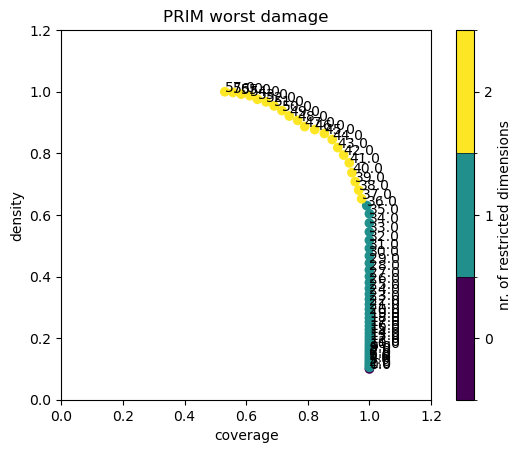

In [5]:
# Perform PRIM analysis
prim_alg = prim.Prim(x, y_worst_damage, threshold=0.8)
box1 = prim_alg.find_box()
box1.show_tradeoff(annotated = True)
plt.title('PRIM worst damage')
plt.show()

In the plot, it can be seen that there is a maximum of 2 restricted dimensions. There is a high coverage and density for various points. The focus will  be on point number 45, since the coverage and density are both equally high for this point.

In [54]:
# Select point
point = 45
box1.inspect(point)

coverage       0.854000
density        0.864372
id            45.000000
k           1281.000000
mass           0.098800
mean           0.864372
n           1482.000000
res_dim        2.000000
Name: 45, dtype: float64

             box 45                                 
                min       max      qp value qp value
A.2_pfail  0.000054  0.142544           NaN      0.0
A.1_pfail  0.311177  0.999994  5.714476e-69      NaN



[None]

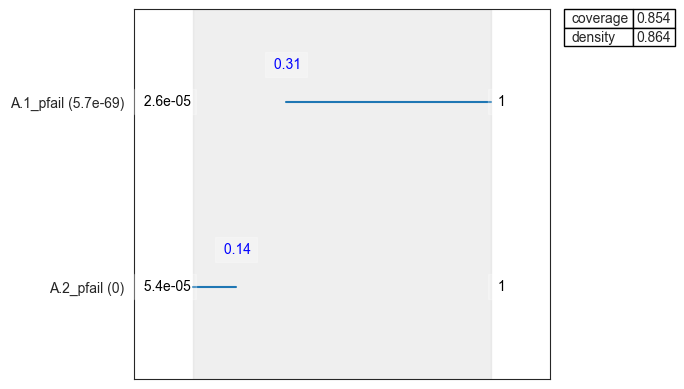

In [55]:
box1.inspect(point, style = 'graph')
plt.show()

When looking at the plot above, it can be seen that the two restricted dimensions for point number 45 are A.1_pfail and A.2_pfail. These two are the key determinants. Both variables are significant and can therefore be interpreted in the rest of the analysis. This box covers 0.85 percent of the cases of interest, and is 80% precize. It can be concluded that the worse case scenarios for A2.Expected Annual Damage occur when A.1_pfail is higher than 0.31, and when A.2_pfail is lower than 0.14. 

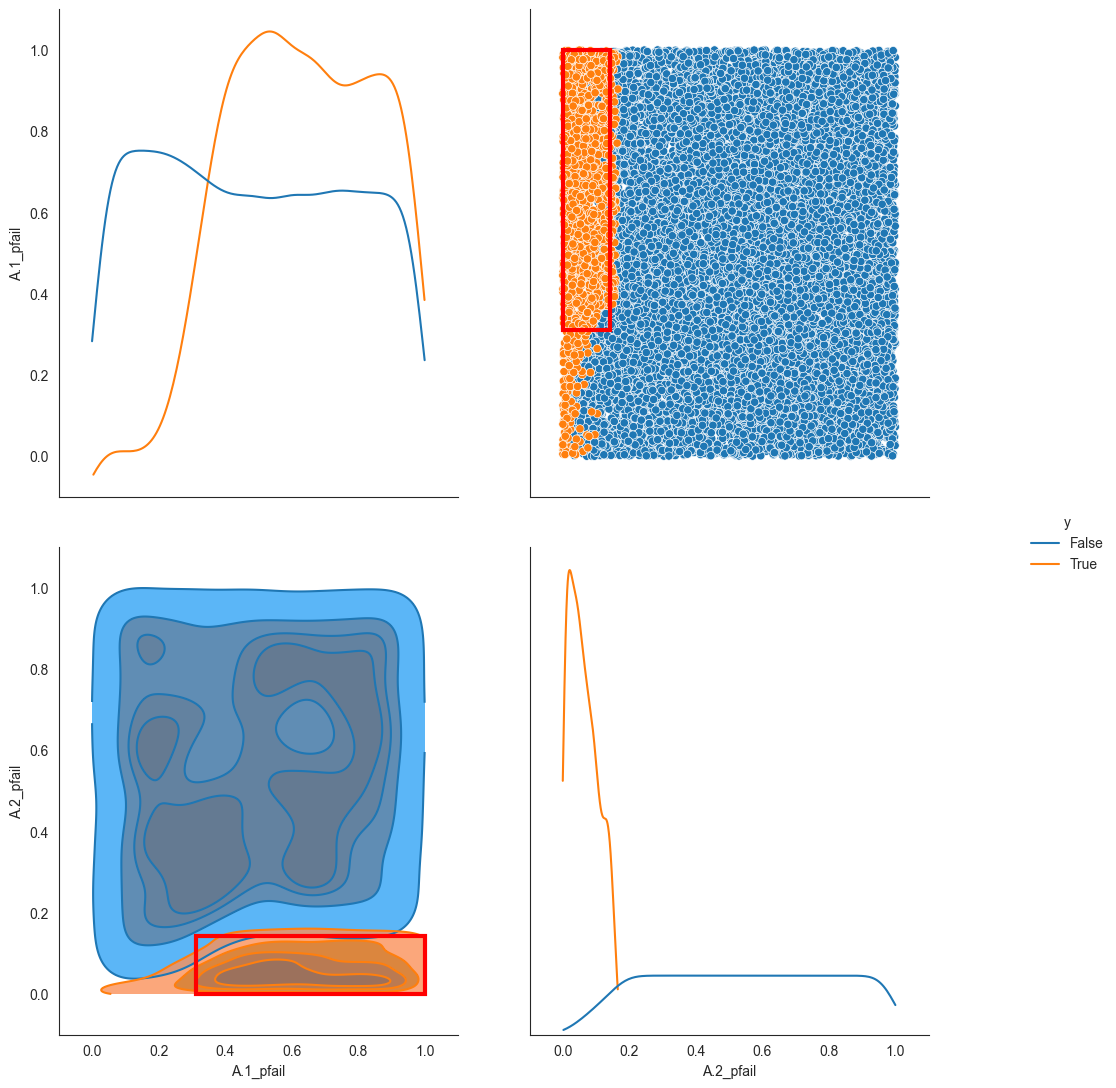

In [ ]:
# Visualize the box for point number 45
box1.select(point)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

When looking at the plot above, the relation between A1_pfail and A.2_pfail becomes clear. When A.1_pfail is high, there is a high chance dike 1 will break. As a result, there might be a flooding by dike 1, which results in less water at dike 2. Therefore, the chance A2 will fail is low in that case. It can be seen in the plots that this does not work the other way around. When A.2_pfail is high, it does not have an effect on A.1_pfail. This can be decleared by the fact that the river flows from Dike 1 to Dike 2. 

### Worst Deaths
The PRIM analysis will also be conducted for the worst deaths. The extra trees showed that the results for worst damages and worst deaths did not differ that much, and therefore it is expected that that would also be the case for this analysis.

[MainProcess/INFO] 15000 points remaining, containing 1501 cases of interest


[MainProcess/INFO] mean: 0.9669926650366748, mass: 0.054533333333333336, coverage: 0.5269820119920053, density: 0.9669926650366748 restricted_dimensions: 5


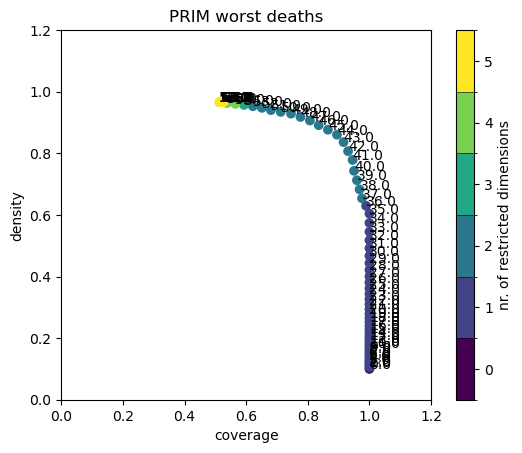

In [7]:
# Perform PRIM analysis
prim_alg_deaths = prim.Prim(x, y_worst_deaths, threshold=0.8)
box2 = prim_alg_deaths.find_box()
box2.show_tradeoff(annotated = True)
plt.title('PRIM worst deaths')
plt.show()

When looking at the plot, the results differ slightly from the worst damages approach. With a high density and lower coverage, there is a higher number of restricted dimensions. However, the focus is on a point with both a high density and high coverage. Therefore, point number 44 has been chosen.

In [58]:
#  Select point
point_deaths = 44
box2.inspect(point_deaths)

coverage       0.894737
density        0.860346
id            44.000000
k           1343.000000
mass           0.104067
mean           0.860346
n           1561.000000
res_dim        2.000000
Name: 44, dtype: float64

             box 44                                 
                min       max      qp value qp value
A.2_pfail  0.000054  0.149501           NaN      0.0
A.1_pfail  0.311147  0.999994  4.907811e-80      NaN



[None]

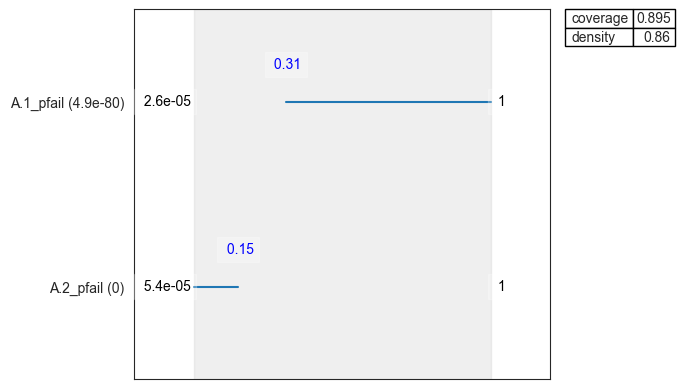

In [59]:
box2.inspect(point_deaths, style = 'graph')
plt.show()

It can be seen that also for the worst deaths, A.1_pfail and A.2_pfail are the key determinants for the worst cases. They are both significant, and almost have the same values as at the worst deaths. 

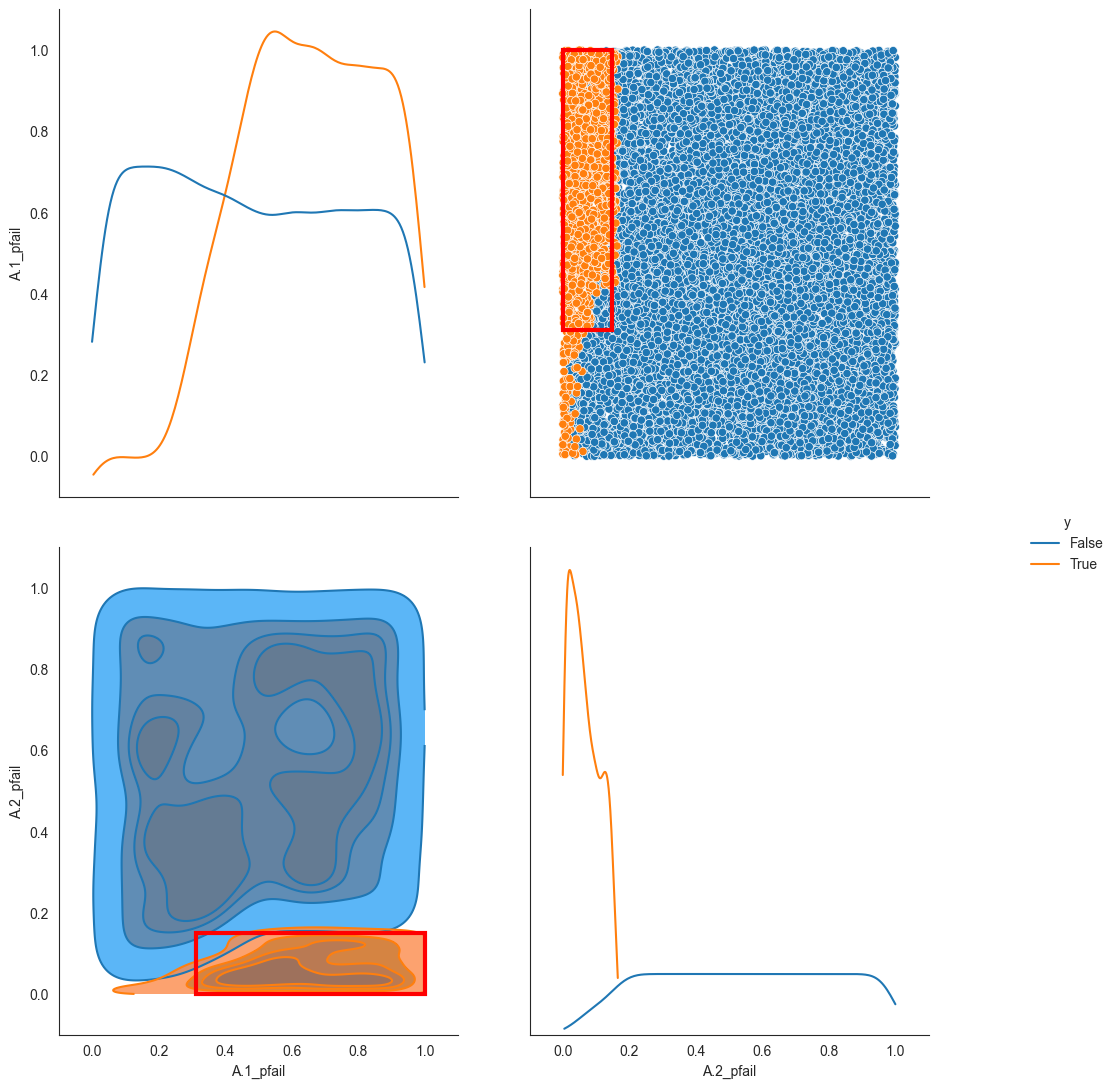

In [60]:
# Visualize the box for point number 45
box2.select(point_deaths)
box2.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

The plot above has the expected behaviour, which relates to the behaviour of the worst damages.

### Conclusion
It can be concluded that the probability of A2 failing and A1 failing are important in the worst case scenarios. All worst case scenarios involve a low probability of withstanding the hydraulic load for A2, while the worst case scenarios have a higher probability of A1 withstanding the hydraulic load. This means that A1 being better suited against hydraulic load can have negative consequences for the damages and deaths at A2. 

This is in line with the results of the Extra Trees analysis, where A.2_pfail has the highest impact on the output expected number of damages and deaths. Furthermore, the Extra Trees analysis did not differ much for the Expected Annual Damage, and Expected Number of Deaths, which is in line with this analysis.  

### Resampling

Resampling has been done to validate our results. A.1pfail and A.2pfail were both significant in the analysis, and therefore it is expected that the resampling will lead to the same results.

In [61]:
# Resample for worst damage
box1.resample(point)

[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
c:\Users\tbous\Anaconda3\envs\MBDM\lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9
c:\Users\tbous\Anaconda3\envs\MBDM\lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value


,reproduce coverage,reproduce density
A.1_pfail,100.0,100.0
A.2_pfail,100.0,100.0
A.0_ID flood wave shape,0.0,0.0
A.1_Bmax,0.0,0.0
A.1_Brate,0.0,0.0
A.2_Bmax,0.0,0.0
A.2_Brate,0.0,0.0
A.3_Bmax,0.0,0.0
A.3_Brate,0.0,0.0
A.3_pfail,0.0,0.0


When looking at the resample results for the worst damages,  the reproduce coverage and density are both 100 for A.1_pfail and A.2_pfail. It is therefore possible to reproduce the exact coverage and density, and it confirms the significance of the values. 

### Dimensional Stacking
Dimensional stacking will be done to check whether the number of scenarios set at the beginning was sufficient, and if there is a good coverage of the space. Since worst damage and worst deaths are having the same behaviour, it has been decided to focus on worst deaths. 

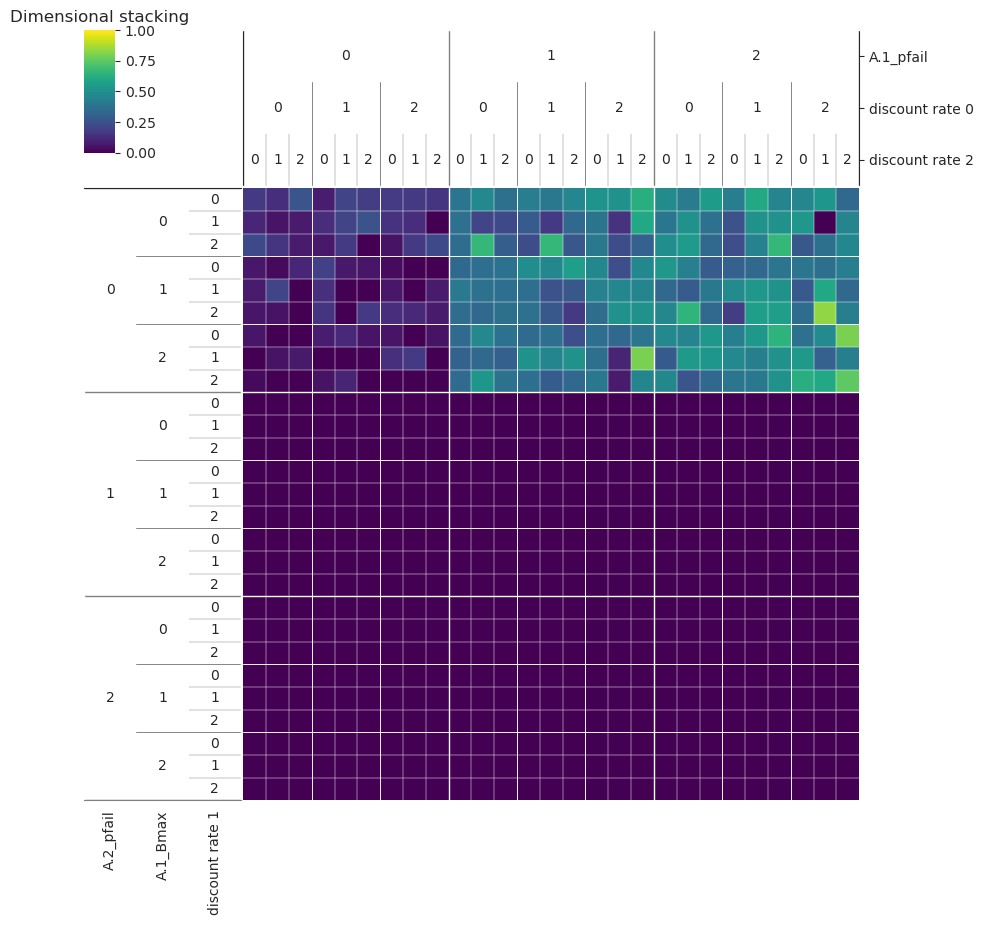

In [8]:
# Dimensional stacking for worst deaths
dimensional_stacking.create_pivot_plot(x, y_worst_deaths)
plt.title('Dimensional stacking')
plt.show()

There are no white spaces left, which indicates that the 15.000 scenarios cover the space well.

# Selecting Scenarios
Based on the PRIM results, five scenarios will be selected to use at the optimization.

The worst case scenarios are selected by using the bounds of the PRIM. The bounds were almost the same for both damages and deaths (0.13 and 0.14 for A.2_pfail, and both 0.31 for A.1_pfail). Therefore, A.2_pfail should not be higher than 0.14 and A.1_pfail should not be lower than 0.31. 

In [9]:
# Define worst case seenarios based on the PRIM
worst_case_scenarios = x[x['A.2_pfail'] <= 0.14]
worst_case_scenarios = worst_case_scenarios[worst_case_scenarios['A.1_pfail'] >= 0.31]
worst_case_scenarios = worst_case_scenarios.reset_index(drop=True)

In [10]:
worst_case_scenarios
worst_case_copy = worst_case_scenarios[:]

To get an overview of all the scenarios, parcoords is used to plot them.

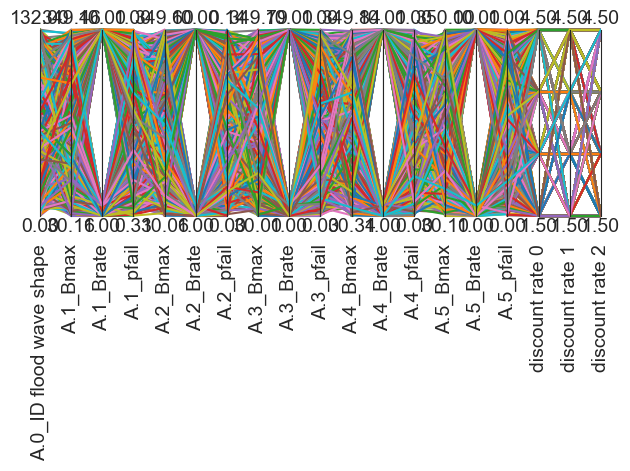

In [11]:
# Define a function to plot the variety of scenarios
def get_parcoords(df, limits_df):
    limits = parcoords.get_limits(limits_df)

    axes = parcoords.ParallelAxes(limits)
    axes.plot(df)

    plt.show()

# Call function to plot the variety of the worst case scenarios
get_parcoords(worst_case_scenarios, worst_case_scenarios)

As can be seen in the plot, the scenarios cover the wide range of values. However, this is not sufficient to choose 5 different scenarios. To further look at the range of the uncertainties in the scenarios, the minimum and maximum values are plotted below.

In [14]:
# Create a function to plot the minimum, maximum and mean value of the uncertainties
def plot_min_max_mean(df):
    fig, ax = plt.subplots()

    for i, column in enumerate(df.columns):
        min_val = df[column].min()
        max_val = df[column].max()
        mean_val = df[column].mean()
        ax.plot(i, mean_val, 'ro')
        ax.text(i, mean_val + 0.3, f'{mean_val:.2f}', ha='center', va='bottom', rotation = 90)
        ax.bar(i, max_val - min_val, bottom=min_val, color='skyblue', edgecolor='black')
        

    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation=90)

    plt.tight_layout()
    plt.title('Worst case scenarios')

    plt.show()

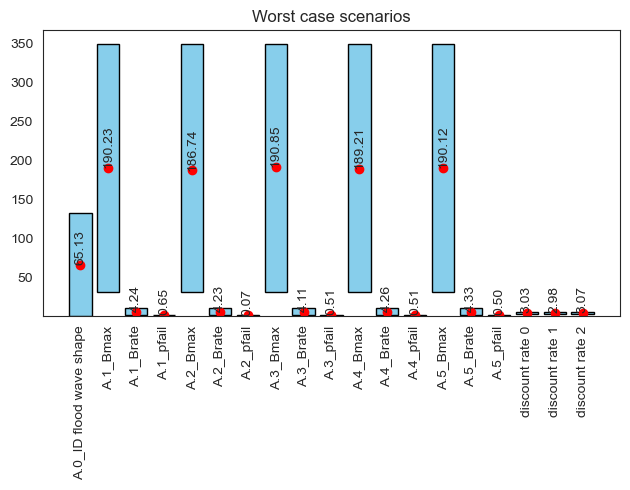

In [15]:
# Call function to create a plot for the worst case scenario
plot_min_max_mean(worst_case_scenarios)

The red dots show the mean values for each uncertainty, and the blue bars represent the ranges of the uncertainties. It can be seen that for example A.1_Brate and A.2_Brate have a range from 0 to 4.24m. Therefore, these dikes should not be increased by more than 4.24meters. 

In [87]:
worst_case_scenarios.describe()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,65.128082,190.229881,4.243493,0.652698,186.739649,4.233904,0.068847,190.852765,4.105137,0.505629,189.205737,4.258562,0.506360,190.121949,4.331849,0.502828,3.030137,2.979452,3.066438
std,38.671682,92.095612,4.154462,0.197512,91.042162,4.155054,0.040415,93.780840,4.112879,0.287723,94.365353,4.162493,0.291470,93.830057,4.184362,0.287637,1.124125,1.114544,1.110284
min,0.000000,30.160259,1.000000,0.310347,30.060893,1.000000,0.000054,30.001354,1.000000,0.000728,30.342350,1.000000,0.000476,30.102037,1.000000,0.000327,1.500000,1.500000,1.500000
25%,31.000000,111.993706,1.000000,0.483732,107.826345,1.000000,0.033705,107.452401,1.000000,0.246970,106.423257,1.000000,0.259804,109.937350,1.000000,0.254409,2.500000,1.500000,2.500000
50%,66.000000,191.934500,1.500000,0.650675,185.128935,1.500000,0.067938,195.078779,1.500000,0.508906,190.407553,1.500000,0.507931,186.082114,1.500000,0.502639,3.500000,2.500000,3.500000
75%,99.000000,267.827324,10.000000,0.822265,263.423944,10.000000,0.103396,272.488887,10.000000,0.758293,273.118974,10.000000,0.762503,271.590006,10.000000,0.755308,4.500000,3.500000,4.500000
max,132.000000,349.462331,10.000000,0.999633,349.603785,10.000000,0.139984,349.785749,10.000000,0.999228,349.838975,10.000000,0.999569,349.996626,10.000000,0.999509,4.500000,4.500000,4.500000


Lastly, five scenarios that cover a wide uncertainty space should be selected. Random samples of scenarios are created, and the sample with the most wide uncertainty space (when looking at the plot below) is selected. 

In [16]:
# Select random samples of 5 scenarios
random_choice = worst_case_scenarios.sample(n=5, random_state= 7)

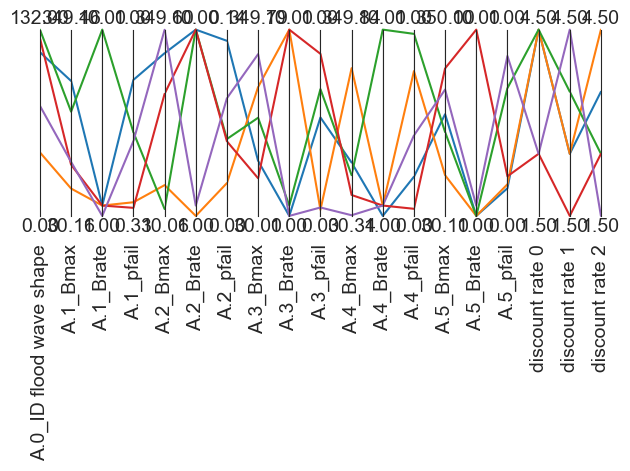

In [17]:
# Check if the sample covers the wide uncertainty ranges
get_parcoords(random_choice, worst_case_scenarios)

This scenario is saved in a list, and dumped in a pickle. Therefore, it can be used in the optimization

In [189]:
# Save scenarios in a list
scenario_list = []
scenario_name = 0
for index, row in random_choice.iterrows():
    scenario_name += 1
    new_scenario = Scenario(scenario_name, **row)
    scenario_list.append(new_scenario)


In [190]:
scenario_list

[Scenario({'A.0_ID flood wave shape': 116.0, 'A.1_Bmax': 261.4719555765077, 'A.1_Brate': 1.5, 'A.1_pfail': 0.813801679629707, 'A.2_Bmax': 309.19563263222454, 'A.2_Brate': 10.0, 'A.2_pfail': 0.131574849562759, 'A.3_Bmax': 124.38115758376944, 'A.3_Brate': 1.0, 'A.3_pfail': 0.5283074673502762, 'A.4_Bmax': 121.80618051849662, 'A.4_Brate': 1.0, 'A.4_pfail': 0.210573714458191, 'A.5_Bmax': 204.70814423279325, 'A.5_Brate': 1.0, 'A.5_pfail': 0.1486526769740555, 'discount rate 0': 4.5, 'discount rate 1': 2.5, 'discount rate 2': 3.5}),
 Scenario({'A.0_ID flood wave shape': 45.0, 'A.1_Bmax': 77.04022937596727, 'A.1_Brate': 1.5, 'A.1_pfail': 0.3608405678721084, 'A.2_Bmax': 82.84116389931579, 'A.2_Brate': 1.0, 'A.2_pfail': 0.02473025592745, 'A.3_Bmax': 251.28086240013675, 'A.3_Brate': 10.0, 'A.3_pfail': 0.0335338697273594, 'A.4_Bmax': 283.67984428952326, 'A.4_Brate': 1.5, 'A.4_pfail': 0.7769827151230987, 'A.5_Bmax': 99.8906100267328, 'A.5_Brate': 1.0, 'A.5_pfail': 0.1699148289119272, 'discount rate 

In [191]:
# Save scenarios in a pickle file
scenario_file = open('scenarioList', 'wb')
pickle.dump(scenario_list, scenario_file)
scenario_file.close()